In [1]:
import os
import mne
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import numpy as np
import pandas as pd
import pickle
from utils import *

In [2]:
# get epoch data
if os.path.exists('../Data/results/dfs_resp.csv') and os.path.exists('../Data/results/dfs_stim.csv') and os.path.exists('../Data/results/dfs_resp_sm.csv') and os.path.exists('../Data/results/dfs_resp_fc.csv'):
    dfs_resp = pd.read_csv('../Data/results/dfs_resp.csv')
    dfs_stim = pd.read_csv('../Data/results/dfs_stim.csv')
    dfs_resp_sm = pd.read_csv('../Data/results/dfs_resp_sm.csv')
    dfs_resp_fc = pd.read_csv('../Data/results/dfs_resp_fc.csv')
    
    dfs_resp.rename(columns={col:int(col) for col in dfs_resp.columns if col.isdigit()} ,inplace=True)
    dfs_stim.rename(columns={col:int(col) for col in dfs_stim.columns if col.isdigit()} ,inplace=True)
    dfs_resp_sm.rename(columns={col:int(col) for col in dfs_resp_sm.columns if col.isdigit()} ,inplace=True)
else:        
    # Load eeg data
    folder_path = '../Data/preprocessed_data'
    file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.fif')]
    raw_data_list = []
    for file_path in file_list:
        raw_data = mne.io.read_raw_fif(file_path)
        raw_data_list.append(raw_data) # raw_data_list is a list of raw data
    # Load behavioral data
    rawdata = pd.read_csv('../Data/results/beh_preprocessed.csv',sep='\t')
    dfs_resp = epoch2df(raw_data_list,rawdata=rawdata, tmin=-3, tmax=1, baseline = (None,0), locked='resp')
    dfs_stim = epoch2df(raw_data_list,rawdata=rawdata,tmin=-1.5, tmax=1.5, baseline = (-1.5,-1),locked='stim')
    dfs_resp_sm = smooth(dfs_resp)
    
    dfs_resp_fc = add_feature(dfs_resp,dfs_resp_sm)
    dfs_resp_fc.drop(columns=np.arange(0,2049),inplace=True)
    

    dfs_resp.to_csv('../Data/results/dfs_resp.csv',index=False)
    dfs_stim.to_csv('../Data/results/dfs_stim.csv',index=False)
    dfs_resp_sm.to_csv('../Data/results/dfs_resp_sm.csv',index=False)
    dfs_resp_fc.to_csv('../Data/results/dfs_resp_fc.csv',index=False)
# rename the column


the correlation coefficient between amplitude and reaction time is:PearsonRResult(statistic=0.0391899351964378, pvalue=0.009924320533643049)
the correlation coefficient between slope and reaction time is:PearsonRResult(statistic=-0.24840845044635, pvalue=7.170658722160895e-62)
the correlation coefficient between peak amplitude and reaction time is:PearsonRResult(statistic=0.9147465369601905, pvalue=0.0)
the correlation coefficient between peak latency and reaction time is:PearsonRResult(statistic=-0.18649922442712835, pvalue=3.591355286208305e-35)


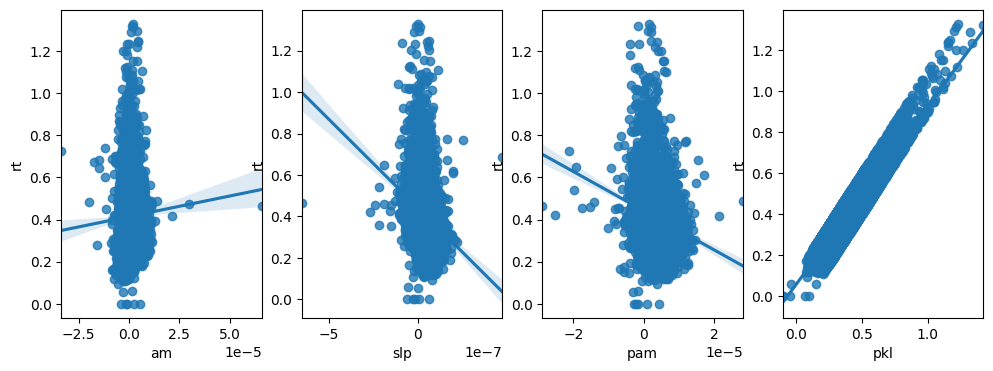

In [3]:
# plot the scatter plot of amplitude, slope and peak against reaction time for each trial
plt.figure(figsize=(15,4))
plt.subplot(151)
sns.regplot(x = 'am', y = 'rt', data = dfs_resp_fc)
plt.subplot(152)
sns.regplot(x = 'slp', y = 'rt', data = dfs_resp_fc)
plt.subplot(153)
sns.regplot(x = 'pam', y = 'rt', data = dfs_resp_fc)
plt.subplot(154)
sns.regplot(x = 'pkl', y = 'rt', data = dfs_resp_fc)
# print the correlation coefficient
print(f"the correlation coefficient between amplitude and reaction time is:{stats.pearsonr(dfs_resp_fc['am'],dfs_resp_fc['rt'])}")
print(f"the correlation coefficient between slope and reaction time is:{stats.pearsonr(dfs_resp_fc['slp'],dfs_resp_fc['rt'])}")
print(f"the correlation coefficient between peak amplitude and reaction time is:{stats.pearsonr(dfs_resp_fc['pkl'],dfs_resp_fc['rt'])}")
print(f"the correlation coefficient between peak latency and reaction time is:{stats.pearsonr(dfs_resp_fc['pam'],dfs_resp_fc['rt'])}")

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_19252\165431285.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scr_sc = dfs_resp_fc.groupby(['subj_idx', 'coherence'])['am','rt','slp','pkl','pam'].mean().reset_index()


the correlation coefficient between amplitude and reaction time is:PearsonRResult(statistic=0.07717573104686289, pvalue=0.674609947358177)
the correlation coefficient between slope and reaction time is:PearsonRResult(statistic=-0.6720956381823207, pvalue=2.5248593477380656e-05)
the correlation coefficient between peak amplitude and reaction time is:PearsonRResult(statistic=0.9630328364483957, pvalue=1.219605364430241e-18)
the correlation coefficient between peak latency and reaction time is:PearsonRResult(statistic=-0.5029974555053545, pvalue=0.00334343165822809)
the t-test between low coherence and high coherence for amplitude is:TtestResult(statistic=-0.5806251895266833, pvalue=0.5701141681686999, df=15)
the t-test between low coherence and high coherence for slope is:TtestResult(statistic=-3.885152892333174, pvalue=0.001464935668662494, df=15)
the t-test between low coherence and high coherence for peak amplitude is:TtestResult(statistic=7.130980481697779, pvalue=3.4434802638315206e

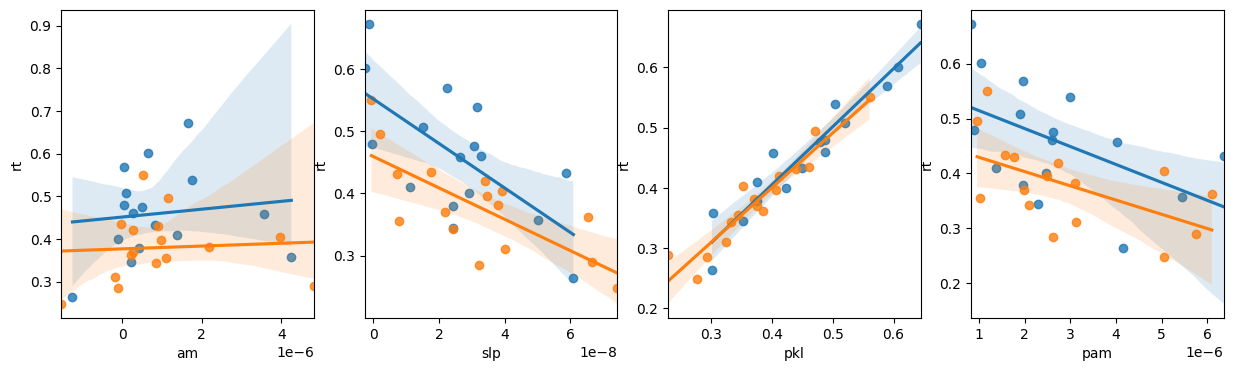

In [30]:
# plot the scatter plot of amplitude, slope and peak against reaction time for each subject and coherence
scr_sc = dfs_resp_fc.groupby(['subj_idx', 'coherence'])['am','rt','slp','pkl','pam'].mean().reset_index()
print(f"the correlation coefficient between amplitude and reaction time is:{stats.pearsonr(scr_sc['am'],scr_sc['rt'])}")
print(f"the correlation coefficient between slope and reaction time is:{stats.pearsonr(scr_sc['slp'],scr_sc['rt'])}")
print(f"the correlation coefficient between peak amplitude and reaction time is:{stats.pearsonr(scr_sc['pkl'],scr_sc['rt'])}")
print(f"the correlation coefficient between peak latency and reaction time is:{stats.pearsonr(scr_sc['pam'],scr_sc['rt'])}")
print(f"the t-test between low coherence and high coherence for amplitude is:{stats.ttest_rel(scr_sc[scr_sc['coherence']=='low']['am'],scr_sc[scr_sc['coherence']=='high']['am'])}")
print(f"the t-test between low coherence and high coherence for slope is:{stats.ttest_rel(scr_sc[scr_sc['coherence']=='low']['slp'],scr_sc[scr_sc['coherence']=='high']['slp'])}")
print(f"the t-test between low coherence and high coherence for peak amplitude is:{stats.ttest_rel(scr_sc[scr_sc['coherence']=='low']['pkl'],scr_sc[scr_sc['coherence']=='high']['pkl'])}")
print(f"the t-test between low coherence and high coherence for peak latency is:{stats.ttest_rel(scr_sc[scr_sc['coherence']=='low']['pam'],scr_sc[scr_sc['coherence']=='high']['pam'])}")
print(f"the permutation test between low coherence and high coherence for amplitude is:{permutation(scr_sc[scr_sc['coherence']=='high']['am'], scr_sc[scr_sc['coherence']=='low']['am'], 10000)}")    
print(f"the permutation test between low coherence and high coherence for slope is:{permutation(scr_sc[scr_sc['coherence']=='high']['slp'], scr_sc[scr_sc['coherence']=='low']['slp'], 10000)}")
print(f"the permutation test between low coherence and high coherence for peak latency is:{permutation(scr_sc[scr_sc['coherence']=='high']['pkl'], scr_sc[scr_sc['coherence']=='low']['pkl'], 10000)}")
print(f"the permutation test between low coherence and high coherence for peak amplitude is:{permutation(scr_sc[scr_sc['coherence']=='high']['pam'], scr_sc[scr_sc['coherence']=='low']['pam'], 10000)}")
print(f"the bootstrap test between low coherence and high coherence for amplitude is:{bootstrap(scr_sc[scr_sc['coherence']=='high']['am'], scr_sc[scr_sc['coherence']=='low']['am'], 10000)}")    
print(f"the bootstrap test between low coherence and high coherence for slope is:{bootstrap(scr_sc[scr_sc['coherence']=='high']['slp'], scr_sc[scr_sc['coherence']=='low']['slp'], 10000)}")
print(f"the bootstrap test between low coherence and high coherence for peak latency is:{bootstrap(scr_sc[scr_sc['coherence']=='high']['pkl'], scr_sc[scr_sc['coherence']=='low']['pkl'], 10000)}")
print(f"the bootstrap test between low coherence and high coherence for peak amplitude is:{bootstrap(scr_sc[scr_sc['coherence']=='high']['pam'], scr_sc[scr_sc['coherence']=='low']['pam'], 10000)}")
# plot the scatter plot of amplitude, slope and peak against reaction time for each subject and coherence
fig, axs = plt.subplots(ncols=4, figsize=(15, 4))
sns.regplot(x = 'am', y = 'rt', data = scr_sc[scr_sc['coherence']=='low'], ax=axs[0])
sns.regplot(x = 'am', y = 'rt', data = scr_sc[scr_sc['coherence']=='high'], ax=axs[0])
sns.regplot(x = 'slp', y = 'rt', data = scr_sc[scr_sc['coherence']=='low'], ax=axs[1])
sns.regplot(x = 'slp', y = 'rt', data = scr_sc[scr_sc['coherence']=='high'], ax=axs[1])
sns.regplot(x = 'pkl', y = 'rt', data = scr_sc[scr_sc['coherence']=='low'], ax=axs[2])
sns.regplot(x = 'pkl', y = 'rt', data = scr_sc[scr_sc['coherence']=='high'], ax=axs[2])
sns.regplot(x = 'pam', y = 'rt', data = scr_sc[scr_sc['coherence']=='low'], ax=axs[3])
sns.regplot(x = 'pam', y = 'rt', data = scr_sc[scr_sc['coherence']=='high'], ax=axs[3])

plt.show()

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_19252\556238037.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scr_sc = dfs_resp_fc.groupby(['subj_idx', 'correct'])['am','rt','slp','pkl','pam'].mean().reset_index()


the correlation coefficient between amplitude and reaction time is:PearsonRResult(statistic=0.02500473844318521, pvalue=0.891946553893235)
the correlation coefficient between slope and reaction time is:PearsonRResult(statistic=-0.6481190836338742, pvalue=6.049647366870761e-05)
the correlation coefficient between peak amplitude and reaction time is:PearsonRResult(statistic=0.961833375066602, pvalue=1.9532471968944495e-18)
the correlation coefficient between peak latency and reaction time is:PearsonRResult(statistic=-0.387185649915617, pvalue=0.02857452877822063)
the t-test between correct and incorrect for amplitude is:TtestResult(statistic=-4.351894198487516, pvalue=0.0005692434739050097, df=15)
the t-test between correct and incorrect for slope is:TtestResult(statistic=-3.899310755087321, pvalue=0.0014232282686360157, df=15)
the t-test between correct and incorrect for peak amplitude is:TtestResult(statistic=5.539751582994136, pvalue=5.667676187725089e-05, df=15)
the t-test between co

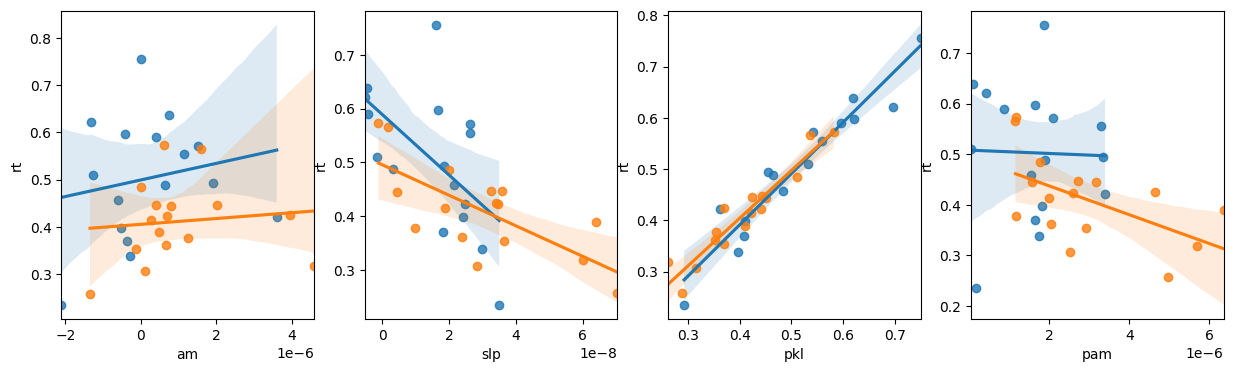

In [7]:
# plot the scatter plot of amplitude, slope and peak against reaction time for each subject and coherence
scr_sc = dfs_resp_fc.groupby(['subj_idx', 'correct'])['am','rt','slp','pkl','pam'].mean().reset_index()
print(f"the correlation coefficient between amplitude and reaction time is:{stats.pearsonr(scr_sc['am'],scr_sc['rt'])}")
print(f"the correlation coefficient between slope and reaction time is:{stats.pearsonr(scr_sc['slp'],scr_sc['rt'])}")
print(f"the correlation coefficient between peak amplitude and reaction time is:{stats.pearsonr(scr_sc['pkl'],scr_sc['rt'])}")
print(f"the correlation coefficient between peak latency and reaction time is:{stats.pearsonr(scr_sc['pam'],scr_sc['rt'])}")
print(f"the t-test between correct and incorrect for amplitude is:{stats.ttest_rel(scr_sc[scr_sc['correct']==0]['am'],scr_sc[scr_sc['correct']==1]['am'])}")
print(f"the t-test between correct and incorrect for slope is:{stats.ttest_rel(scr_sc[scr_sc['correct']==0]['slp'],scr_sc[scr_sc['correct']==1]['slp'])}")
print(f"the t-test between correct and incorrect for peak amplitude is:{stats.ttest_rel(scr_sc[scr_sc['correct']==0]['pkl'],scr_sc[scr_sc['correct']==1]['pkl'])}")
print(f"the t-test between correct and incorrect for peak latency is:{stats.ttest_rel(scr_sc[scr_sc['correct']==0]['pam'],scr_sc[scr_sc['correct']==1]['pam'])}")
print(f"the permutation test between correct and incorrect for amplitude is:{permutation(scr_sc[scr_sc['correct']==1]['am'], scr_sc[scr_sc['correct']==0]['am'], 10000)}")    
print(f"the permutation test between correct and incorrect coherence for slope is:{permutation(scr_sc[scr_sc['correct']==1]['slp'], scr_sc[scr_sc['correct']==0]['slp'], 10000)}")
print(f"the permutation test between correct and incorrect coherence for peak latency is:{permutation(scr_sc[scr_sc['correct']==1]['pkl'], scr_sc[scr_sc['correct']==0]['pkl'], 10000)}")
print(f"the permutation test between correct and incorrect coherence for peak amplitude is:{permutation(scr_sc[scr_sc['correct']==1]['pam'], scr_sc[scr_sc['correct']==0]['pam'], 10000)}")

print(f"the bootstrap test between correct and incorrect for amplitude is:{bootstrap(scr_sc[scr_sc['correct']==1]['am'], scr_sc[scr_sc['correct']==0]['am'], 10000)}")    
print(f"the bootstrap test between correct and incorrect coherence for slope is:{bootstrap(scr_sc[scr_sc['correct']==1]['slp'], scr_sc[scr_sc['correct']==0]['slp'], 10000)}")
print(f"the bootstrap test between correct and incorrect coherence for peak latency is:{bootstrap(scr_sc[scr_sc['correct']==1]['pkl'], scr_sc[scr_sc['correct']==0]['pkl'], 10000)}")
print(f"the bootstrap test between correct and incorrect coherence for peak amplitude is:{bootstrap(scr_sc[scr_sc['correct']==1]['pam'], scr_sc[scr_sc['correct']==0]['pam'], 10000)}")
# plot the scatter plot of amplitude, slope and peak against reaction time for each subject and coherence
fig, axs = plt.subplots(ncols=4, figsize=(15, 4))
sns.regplot(x = 'am', y = 'rt', data = scr_sc[scr_sc['correct']==0], ax=axs[0])
sns.regplot(x = 'am', y = 'rt', data = scr_sc[scr_sc['correct']==1], ax=axs[0])
sns.regplot(x = 'slp', y = 'rt', data = scr_sc[scr_sc['correct']==0], ax=axs[1])
sns.regplot(x = 'slp', y = 'rt', data = scr_sc[scr_sc['correct']==1], ax=axs[1])
sns.regplot(x = 'pkl', y = 'rt', data = scr_sc[scr_sc['correct']==0], ax=axs[2])
sns.regplot(x = 'pkl', y = 'rt', data = scr_sc[scr_sc['correct']==1], ax=axs[2])
sns.regplot(x = 'pam', y = 'rt', data = scr_sc[scr_sc['correct']==0], ax=axs[3])
sns.regplot(x = 'pam', y = 'rt', data = scr_sc[scr_sc['correct']==1], ax=axs[3])

plt.show()

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_12520\1155062690.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scr_s = dfs_resp_fc.groupby(['subj_idx'])['am','rt','slp','pkl','pam'].mean().reset_index()


the correlation coefficient between amplitude and reaction time is:PearsonRResult(statistic=0.09578675803246618, pvalue=0.7241784625731851)
the correlation coefficient between slope and reaction time is:PearsonRResult(statistic=-0.7199044215695046, pvalue=0.0016631023186454332)
the correlation coefficient between peak amplitude and reaction time is:PearsonRResult(statistic=0.9549472716186674, pvalue=8.965053930923133e-09)
the correlation coefficient between peak latency and reaction time is:PearsonRResult(statistic=-0.5557876729252706, pvalue=0.02539241486463637)


<Axes: xlabel='pam', ylabel='rt'>

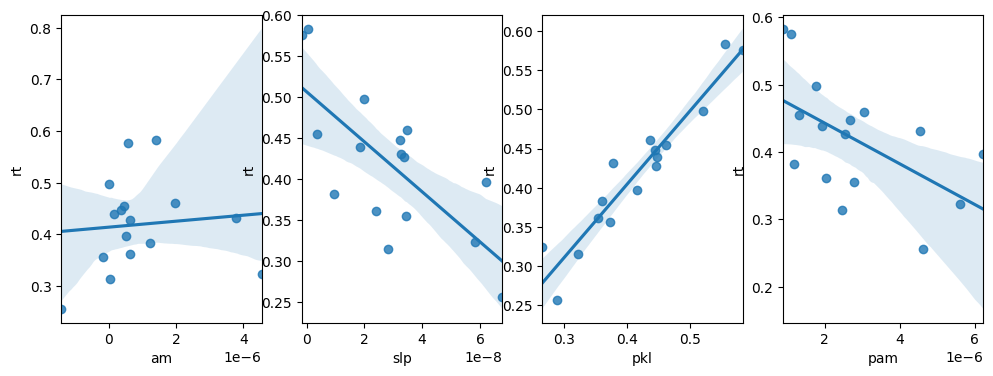

In [18]:
# plot the scatter plot of amplitude, slope and peak against reaction time for each subject
scr_s = dfs_resp_fc.groupby(['subj_idx'])['am','rt','slp','pkl','pam'].mean().reset_index()
print(f"the correlation coefficient between amplitude and reaction time is:{stats.pearsonr(scr_s['am'],scr_s['rt'])}")
print(f"the correlation coefficient between slope and reaction time is:{stats.pearsonr(scr_s['slp'],scr_s['rt'])}")
print(f"the correlation coefficient between peak amplitude and reaction time is:{stats.pearsonr(scr_s['pkl'],scr_s['rt'])}")
print(f"the correlation coefficient between peak latency and reaction time is:{stats.pearsonr(scr_s['pam'],scr_s['rt'])}")
# plot the scatter plot of amplitude, slope and peak against reaction time for each subject and coherence
plt.figure(figsize=(15,4))
plt.subplot(151)
sns.regplot(x = 'am', y = 'rt', data = scr_s)
plt.subplot(152)
sns.regplot(x = 'slp', y = 'rt', data = scr_s)
plt.subplot(153)
sns.regplot(x = 'pkl', y = 'rt', data = scr_s)
plt.subplot(154)
sns.regplot(x = 'pam', y = 'rt', data = scr_s)


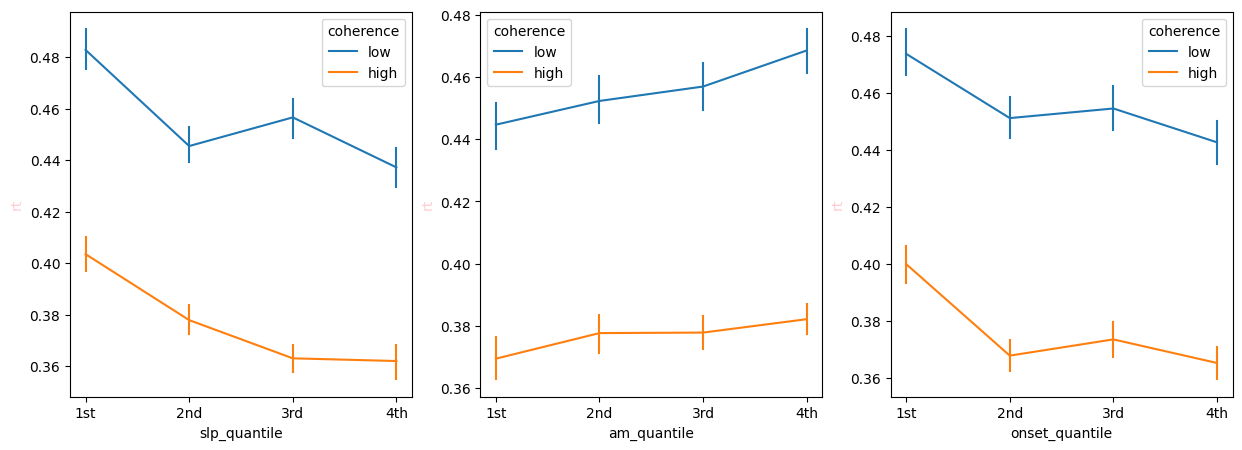

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))


sns.lineplot(x='slp_quantile', y='rt', hue='coherence', err_style='bars', data=dfs_resp_fc.sort_values(by=['slp_quantile']), ci=68, color='#FFCDD2', ax=axs[0])
axs[0].set_xlabel('slp_quantile')
axs[0].set_ylabel('rt', color='#FFCDD2')
axs[0].tick_params(axis='y')

sns.lineplot(x='am_quantile', y='rt', hue='coherence', err_style='bars', data=dfs_resp_fc.sort_values(by=['slp_quantile']), ci=68, color='#FFCDD2', ax=axs[1])
axs[1].set_xlabel('am_quantile')
axs[1].set_ylabel('rt', color='#FFCDD2')
axs[1].tick_params(axis='y')

sns.lineplot(x='pam_quantile', y='rt', hue='coherence', err_style='bars', data=dfs_resp_fc.sort_values(by=['slp_quantile']), ci=68, color='#FFCDD2', ax=axs[2])
axs[2].set_xlabel('onset_quantile')
axs[2].set_ylabel('rt', color='#FFCDD2')
axs[2].tick_params(axis='y')

plt.show()